In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tips = pd.read_csv(r"C:\Users\Asus\Desktop\pyhon BI\Tips_Quick_EDA.csv")

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0


In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           245 non-null object
smoker        245 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null float64
dtypes: float64(3), object(4)
memory usage: 13.5+ KB


#### 1 What is the overall average tip?


In [5]:
tips['tip'].describe()


count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

calculated the avg to the maximum tip = 10.0 and minimun tip = 1.0

#### 2  Get a numerical summary for 'tip' - are the median and mean very different? What does this tell you about the field?


In [6]:
tips['tip'].mean()

2.9982786885245902

In [7]:
tips['tip'].median()

2.9

In [8]:
tips.groupby(['tip']).agg(['mean', 'median']).sum()

total_bill  mean      2520.226010
            median    2508.135000
size        mean       321.510716
            median     320.000000
dtype: float64

there is calculated mean and median value for tip and give different to each other

####  3  Prepare a boxplot for 'tip', are there any outliers?


In [9]:
tips['tip'].isnull().sum()

1

In [10]:
tips1 = tips.dropna(subset = ['tip'])
tips1.shape

(244, 7)

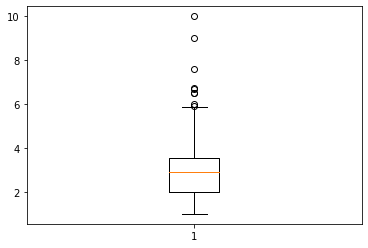

In [11]:
plt.boxplot(tips1['tip'])
plt.show()


there is outlier in the boxplot is above the 6.4 there is outlier in the tip

##### 4   Prepare a boxplot for ' total_bill ', are there any outliers?

In [12]:
tips['total_bill'].isnull().sum()

1

In [13]:
tips = tips.dropna(subset = ['total_bill'])


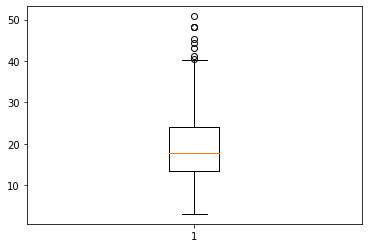

In [14]:
plt.boxplot(tips['total_bill'])
plt.show()

there is outlier in the boxplot is above the 40 there is outlier in the total_bill

#####  5 Gender: what is the percent of females in the data? 
 

In [15]:
tips['sex'].value_counts(normalize = True)[1].max()*100

35.65573770491803

there is in the dataset how many percentage of women in the  sex then calculated the  value is = 36 % women in sex 

#### 6  Prepare a bar plot with the bars representing the percentage of records for each gender.


In [16]:
gender = tips1['sex'].value_counts(normalize = True)
gender

Male      0.643443
Female    0.356557
Name: sex, dtype: float64

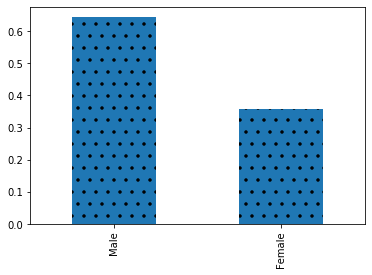

In [17]:
tips.sex.value_counts(normalize = True).plot.bar(hatch = '.')
plt.show()

there is barplot it is show for the total percentage for gender like as male = 64 %  as well as female = 36% 

#### 7  Does the average tip differ by gender? Does one gender tip more than the other?


In [18]:
tips['tip'].groupby(tips['sex'] ).describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,87.0,2.833448,1.159495,1.0,2.0,2.75,3.50,6.5
Male,157.0,3.089618,1.489102,1.0,2.0,3.00,3.76,10.0


there is tip by gender then show the one gender is show the maximum tip other than one its show more male is more tip compare to female

####  8 Does the average tip differ by the time of day?


In [19]:
tips['tip'].groupby(tips['time']).describe()

,count,mean,std,min,25%,50%,75%,max
time,,,,,,,,
Dinner,176.0,3.102670,1.436243,1.00,2.0,3.00,3.6875,10.0
Lunch,68.0,2.728088,1.205345,1.25,2.0,2.25,3.2875,6.7


there is time for dinner and lunch there are very type of tip given like as dinner = 10.0 its is highest and lunch = 6.7

####  9 Does the average tip differ by size (number of people at the table)? 


In [20]:
tips['tip'].groupby(tips['size']).describe()

,count,mean,std,min,25%,50%,75%,max
size,,,,,,,,
1.0,4.0,1.437500,0.506516,1.00,1.0000,1.415,1.8525,1.92
2.0,156.0,2.582308,0.985501,1.00,2.0000,2.500,3.1450,5.85
3.0,38.0,3.393158,1.557344,1.36,2.3575,3.290,3.6825,10.00
4.0,37.0,4.135405,1.640668,2.00,3.0000,3.760,5.0700,9.00
5.0,5.0,4.028000,1.440111,2.00,3.0000,5.000,5.0000,5.14
6.0,4.0,5.225000,1.053170,4.20,4.8000,5.000,5.4250,6.70


there is size for diiferent people in table that why the given tip there is maximum tip given by the size = 3.0 then tip = max = 10

#### 10  Do smokers tip more than non-smokers?


In [21]:
tips['tip'].groupby(tips['smoker']).mean()

smoker
No     2.991854
Yes    3.008710
Name: tip, dtype: float64

there is smoker give to  more tip  than  to  non smoker  like tip = 10 dollars give by smoker its maxmium tip 

#### 11 Gender vs. smoker/non-smoker and tip size - create a 2 by 2 and get the average tip size. Which group tips the most?


In [22]:
tips['tip'].groupby([tips['smoker'] , tips['sex']]).mean().unstack()


sex,Female,Male
smoker,,
No,2.773519,3.113402
Yes,2.931515,3.051167


there is which female and male how much tip to give for smoker its is maxmimun as well as min like as female is no smoke
min is 1.0 tip  and male is no smoke min is 1.0 and female is smoking then tip is 6.5 and male is smoking then tip is 10.0

#### 12 Create a new metric called 'pct_tip' = tip/ total_bill - this would be percent tip give,and should be a better measure of the tipping behaviour.


there is calculated percentage tip for tip/total_bill with tip in percentage 

In [23]:
tips['pct_tip']=tips['tip']/tips['total_bill']
tips['pct_tip'].head()

0    0.059447
1    0.160542
2    0.166587
3    0.139780
4    0.146808
Name: pct_tip, dtype: float64

In [24]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,pct_tip
0,16.99,1.01,Female,No,Sun,Dinner,2.0,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3.0,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3.0,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2.0,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4.0,0.146808


#### 13 Does pct_tip differ by gender? Does one gender tip more than the other?


In [25]:
tips['pct_tip'].groupby(tips['sex']).describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,87.0,0.166491,0.053632,0.056433,0.140416,0.155581,0.194266,0.416667
Male,157.0,0.157651,0.064778,0.035638,0.121389,0.153492,0.186240,0.710345


there is percentage_tip to the tip how much tip will be given by total percentage wise like as 1.0 dollar the max percentage = 32 

#### 14 Does pct_tip differ Does pct_tip differ by size (number of people at the table)? 


In [26]:
tips['pct_tip'].groupby(tips['size']).mean()

size
1.0    0.217292
2.0    0.165719
3.0    0.152157
4.0    0.145949
5.0    0.141495
6.0    0.156229
Name: pct_tip, dtype: float64

#### 15 Make the gender vs. smoker view using pct_tip  - does your inference change?


In [27]:
tips['pct_tip'].groupby([tips['smoker'],tips['sex']]).mean().unstack()

sex,Female,Male
smoker,,
No,0.156921,0.160669
Yes,0.182150,0.152771


#### 16 Make a scatter plot of total_bill vs. tip.


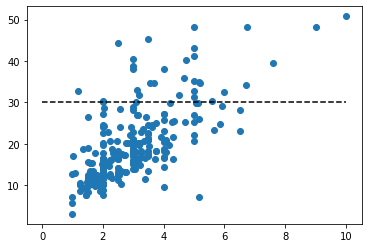

In [28]:
plt.scatter(x = tips['tip'] , y =tips['total_bill'])
plt.hlines(y=30, xmin=0,xmax=10, linestyles ="dashed")
plt.show()

there is tip given by in the most people like as 2 to 4  and total_bill like as 10 to 30 dollars

#### 17 Make a scatter plot of total_bill vs. pct_tip.


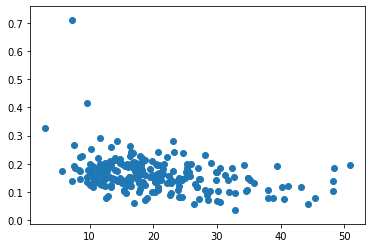

In [29]:
plt.scatter(x = tips['total_bill'] , y = tips['pct_tip'])
plt.show()

there is total bill is to 10 to 30 dollars then will percentage of tip like as 10 to 20